In [25]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import pathlib
import ptitprince as pt
import seaborn as sns 

dir_data = 'data'
dir_output = 'output'

df = pd.read_csv(os.path.join(dir_data, 'herodata.csv'))

In [26]:
df.head()

,hero,role,speed,sight,rating_damage,rating_survivability,rating_utility,life_amount,life_scale,life_regenRate,life_regenScale,weapon_damage,weapon_damageScale,weapon_period,weapon_range
0,Abathur,Support,4.8398,12.0,3.0,1.0,7.0,685.0,0.04,1.4257,0.04,26.0,0.04,0.7000,1.0
1,Alarak,Melee Assasin,4.8398,12.0,7.0,6.0,7.0,1950.0,0.04,4.0585,0.04,150.0,0.04,0.8332,1.5
2,Alexstrasza,Healer,4.8398,12.0,3.0,4.0,6.0,1698.0,0.04,3.5390,0.04,73.0,0.04,1.0000,5.5
3,Cassia,Ranged Assasin,4.8398,12.0,7.0,6.0,5.0,1660.0,0.04,3.4570,0.04,120.0,0.04,0.9000,2.0
4,Ana,Healer,4.8398,12.0,3.0,3.0,7.0,1598.0,0.04,3.3281,0.04,30.0,0.04,0.7500,6.5


In [27]:
data_summ = df.groupby('role').describe().T
data_summ.to_csv(os.path.join(dir_output, 'data_summary.csv'))
data_summ

role                Bruiser   Healer  Melee Assasin  Ranged Assasin  Support  \
speed        count  17.0000  16.0000   1.000000e+01    2.900000e+01   3.0000   
             mean    4.8398   4.8398   4.839800e+00    4.839800e+00   4.8398   
             std     0.0000   0.0000   9.362223e-16    9.038996e-16   0.0000   
             min     4.8398   4.8398   4.839800e+00    4.839800e+00   4.8398   
             25%     4.8398   4.8398   4.839800e+00    4.839800e+00   4.8398   
...                     ...      ...            ...             ...      ...   
weapon_range min     1.0000   1.0000   1.250000e+00    1.500000e+00   1.0000   
             25%     1.5000   1.6875   1.312500e+00    4.500000e+00   2.7500   
             50%     1.5000   5.5000   1.500000e+00    5.500000e+00   4.5000   
             75%     2.0000   5.5000   1.875000e+00    5.500000e+00   5.0000   
             max     3.7500   6.5000   2.250000e+00    7.000000e+00   5.5000   

role                        Tank  
speed        count  1.300000e+01  
             mean   4.839800e+00  
             std    1.848891e-15  
             min    4.839800e+00  
             25%    4.839800e+00  
...                          ...  
weapon_range min    1.000000e+00  
             25%    1.250000e+00  
             50%    1.500000e+00  
             75%    1.500000e+00  
             max    4.500000e+00  

[104 rows x 6 columns]

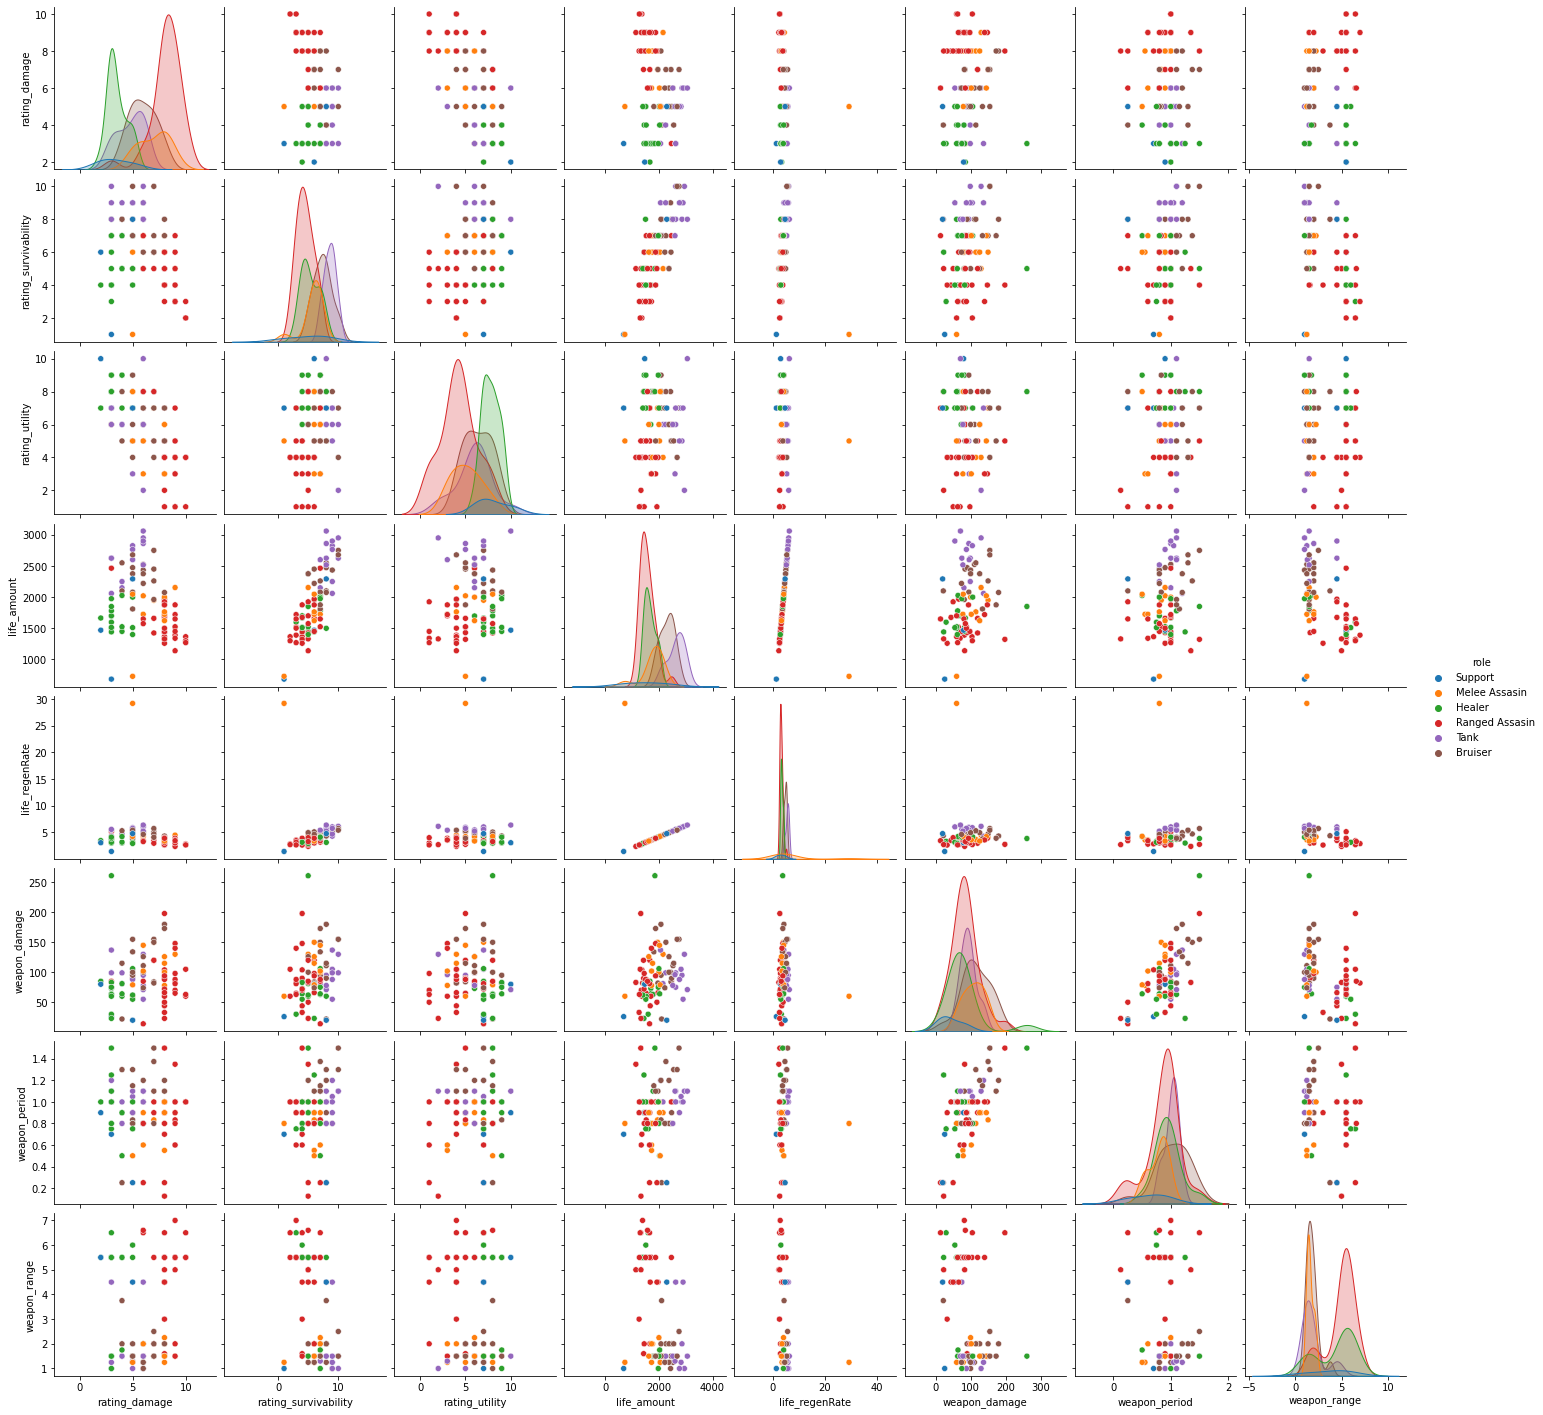

In [28]:
# drop variables with little or no variation
df = df.drop(['speed', 'sight', 'life_scale', 'life_regenScale', 'weapon_damageScale'], axis=1)

sns.pairplot(df, hue='role')
plt.savefig(os.path.join(dir_output, 'corr_plot_reduced.png'))

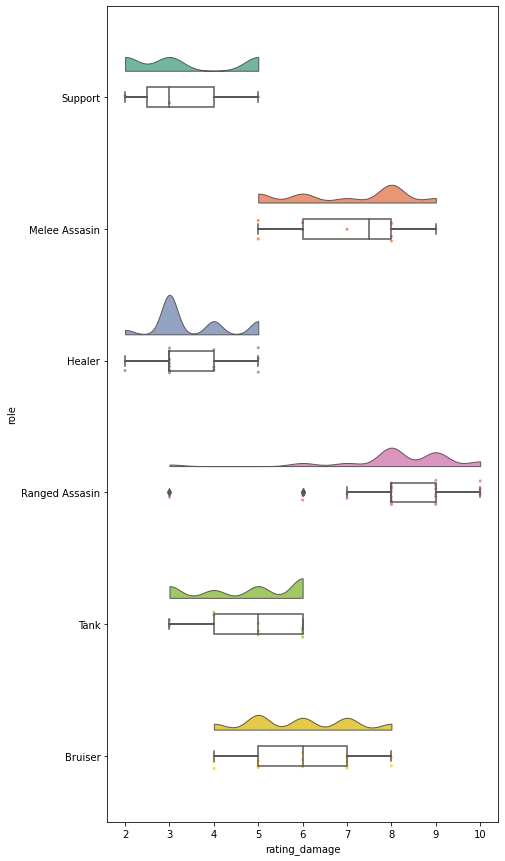

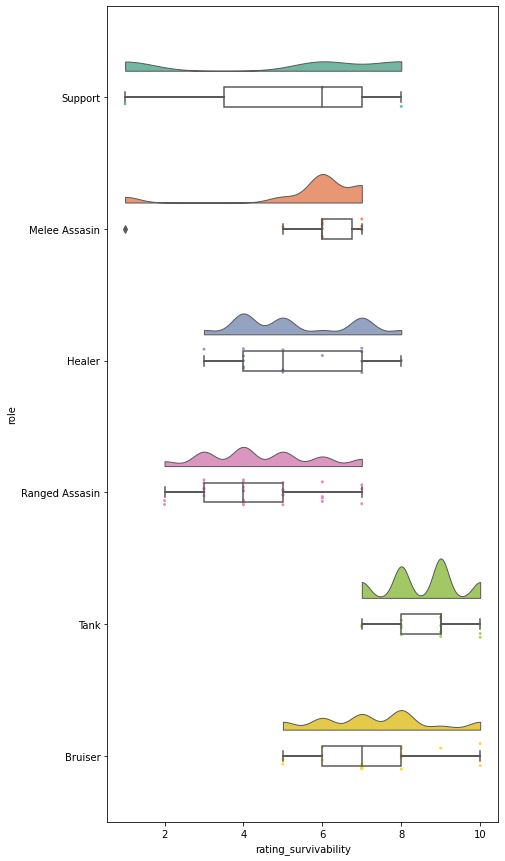

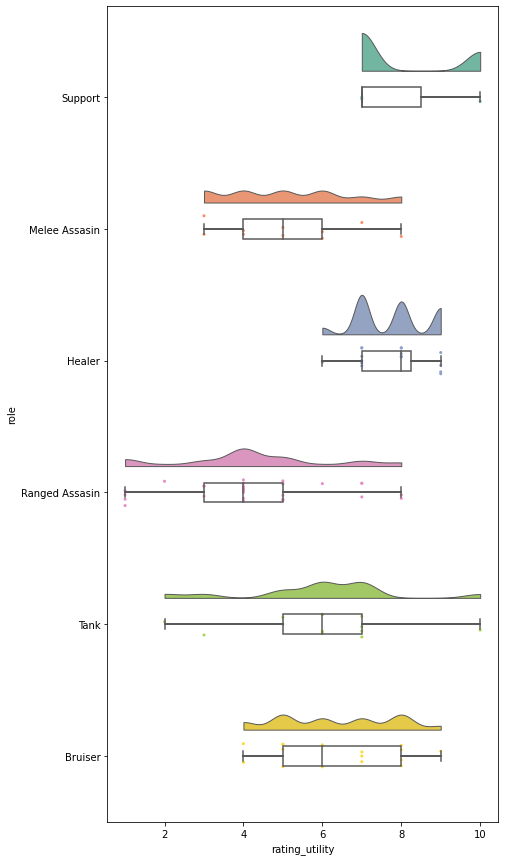

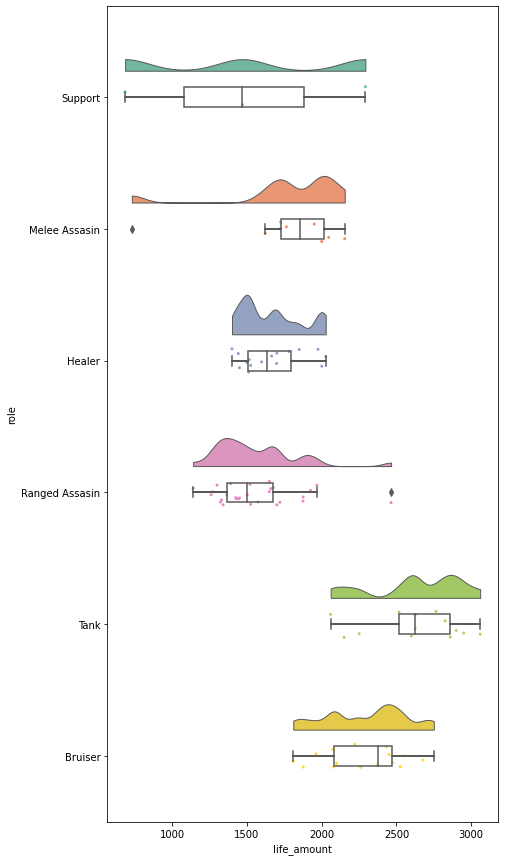

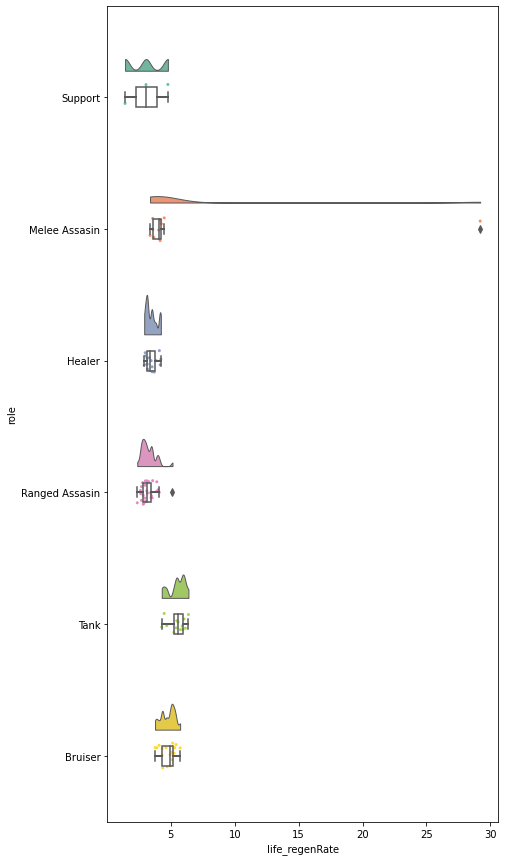

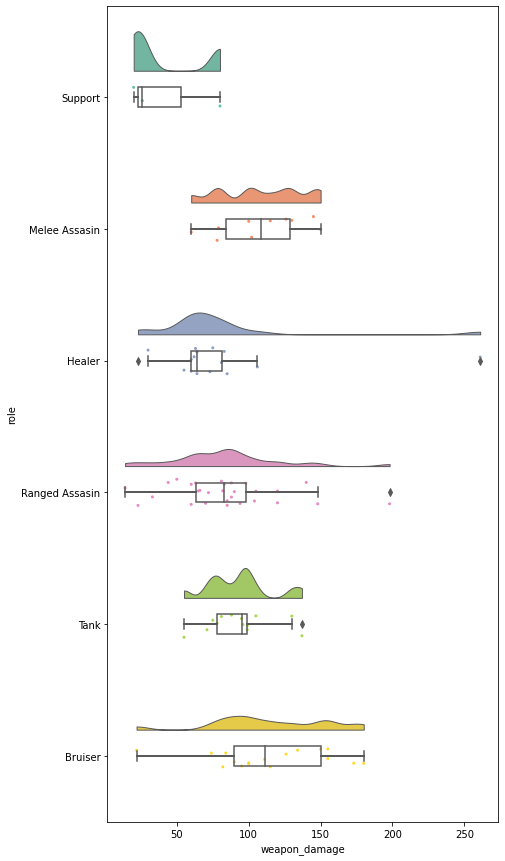

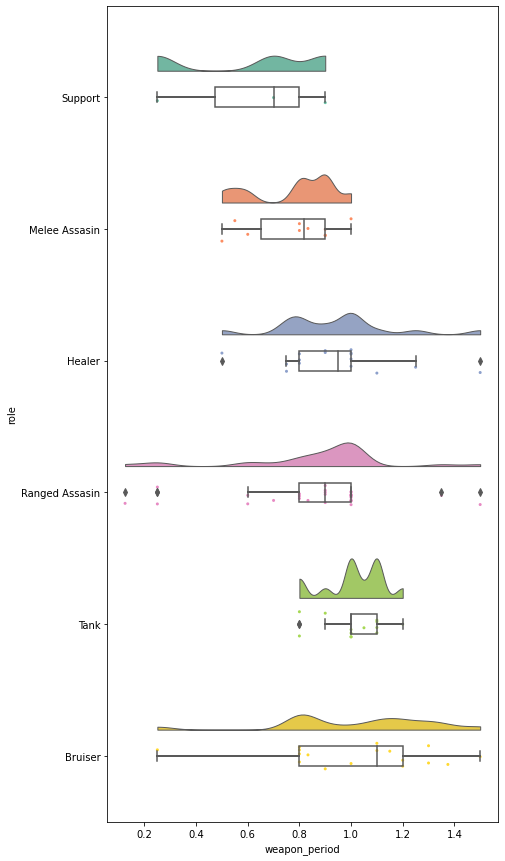

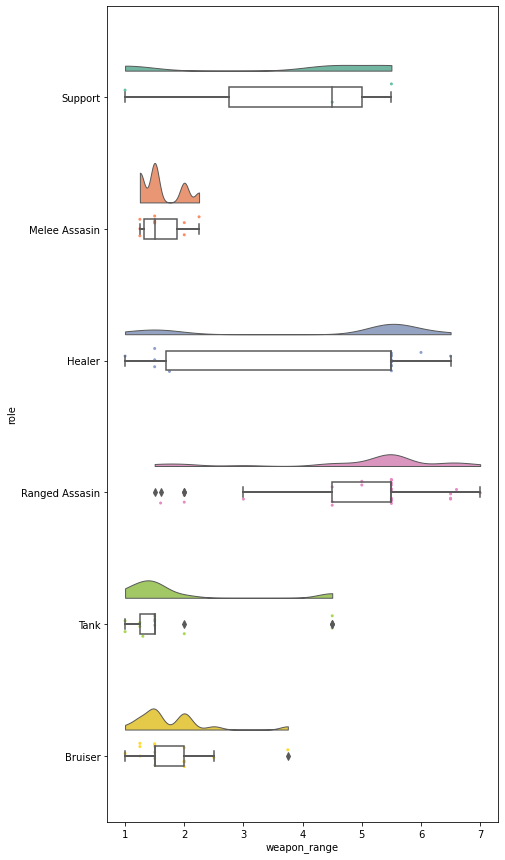

In [33]:
# create directory if does not exist
pathlib.Path(os.path.join(dir_output, 'raincloudPlots')).mkdir(exist_ok=True) 

# graph parameters
pal = "Set2"  # color palett
dx = 'role'   # grouping variable
ort = 'h'     # graph orientaion

# graph each variable
for dy in df.columns[2:]:

    f, ax = plt.subplots(figsize=(7, 15))
    pt.RainCloud(x = dx, y = dy, data = df, palette = pal, bw = .2,
                    width_viol = .6, ax = ax, orient = ort)
    plt.savefig(os.path.join(dir_output, 'raincloudPlots', dy))
